Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Reading the file using pandas

In [2]:
path = "F:\machine-learning-ex1\ex1\ex1data1.txt"
dataset = pd.read_csv(
    path,
    header = None,
    names = ['Population','Profit']
)

Plot the data

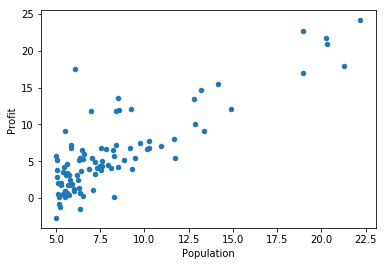

In [3]:
dataset.plot(
    kind="scatter",
    x="Population",
    y="Profit"
)

Computing the cost using Squared Mean function

In [4]:
def computeCost(x,y,theta):
    inner = np.power(((X*theta.T)-y),2)
    return np.sum(inner)/(2*len(x))

Padding a column of 1s to X

In [5]:
dataset.insert(0,'Ones',1)

Seperate X and Y

In [6]:
X = dataset.iloc[:,0:dataset.shape[1]-1]
Y = dataset.iloc[:,dataset.shape[1]-1:dataset.shape[1]]

Converting Panda dataframe to numpy matrix

In [7]:
X = np.matrix(X.values)  
Y = np.matrix(Y.values)
theta = np.zeros([1,2])

Defining Gradient Descent

In [8]:
def gradientDescent(X,Y,theta,learning_rate,iterations):
    tmp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[0])
    cost = np.zeros(iterations)
    
    for i in range(iterations):
        error = (X * theta.T) - Y
        
        for j in range(parameters):
            term = np.multiply(error,X[:,j])
            tmp[0,j] = theta[0,j] - ((learning_rate/len(X))*np.sum(term))
            
        theta = tmp
        cost[i] = computeCost(X,Y,theta)
        
    return theta,cost
            

Calculating Updated Parameters

In [9]:
g,cost = gradientDescent(X,Y,theta,0.01,1000)

Plotting the final prediction graph

Text(0.5,1,'Predicted Profit vs. Population Size')

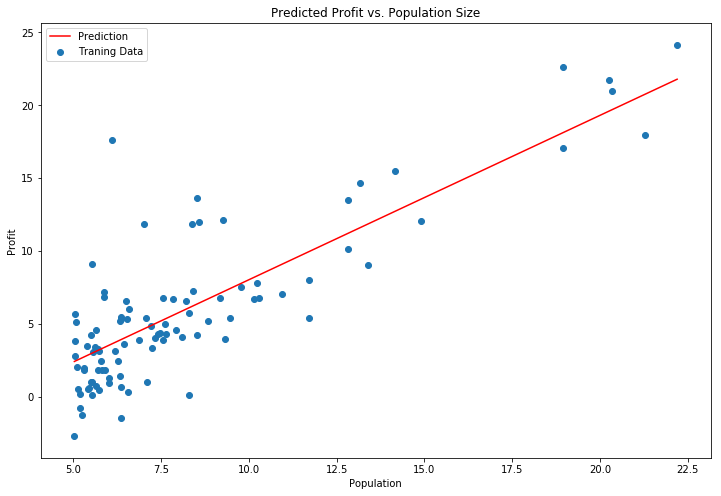

In [12]:
x = np.linspace(dataset.Population.min(), dataset.Population.max(), 100)  
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(dataset.Population, dataset.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')